In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data set preparation and cleaning

In [2]:
df = pd.read_csv("TestData.csv")
df.head(10)

customer_id  country  tenure  SAP Advanced Planner and Optimizer  \
0     15634602   France       2                                   1   
1     15647311    Spain       1                                   0   
2     15619304   France       8                                   0   
3     15701354   France       1                                   1   
4     15737888    Spain       2                                   1   
5     15574012    Spain       8                                   0   
6     15592531   France       7                                   0   
7     15656148  Germany       4                                   0   
8     15792365   France       4                                   0   
9     15592389   France       2                                   0   

   SAP Cost Center Accounting  SAP Enterprise Learning  active_member  \
0                           0                        1              1   
1                           1                        1              1   
2                           1                        0              0   
3                           1                        1              0   
4                           0                        0              1   
5                           1                        0              0   
6                           1                        0              1   
7                           1                        0              0   
8                           1                        0              1   
9                           0                        1              1   

   Customer feedback Ratings  churn  
0                          3      1  
1                          3      0  
2                          5      1  
3                          1      0  
4                          3      0  
5                          3      1  
6                          4      0  
7                          2      1  
8                          1      0  
9                          2      0

In [3]:
df.drop(['customer_id'], inplace =True, axis = 1)

In [4]:
df.head()

country  tenure  SAP Advanced Planner and Optimizer  \
0  France       2                                   1   
1   Spain       1                                   0   
2  France       8                                   0   
3  France       1                                   1   
4   Spain       2                                   1   

   SAP Cost Center Accounting  SAP Enterprise Learning  active_member  \
0                           0                        1              1   
1                           1                        1              1   
2                           1                        0              0   
3                           1                        1              0   
4                           0                        0              1   

   Customer feedback Ratings  churn  
0                          3      1  
1                          3      0  
2                          5      1  
3                          1      0  
4                          3      0

In [5]:
df.shape

(10000, 8)

Columns to remove:
    1. credit_score
    2. balance
    3. credit_card
    4. estimated_salary

In [6]:
df.dtypes

country                               object
tenure                                 int64
SAP Advanced Planner and Optimizer     int64
SAP Cost Center Accounting             int64
SAP Enterprise Learning                int64
active_member                          int64
Customer feedback Ratings              int64
churn                                  int64
dtype: object

Check if any duplicates in dataset

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Length: 10000, dtype: bool

Check columns list and missing values

In [8]:
df.isnull().sum()

country                               0
tenure                                0
SAP Advanced Planner and Optimizer    0
SAP Cost Center Accounting            0
SAP Enterprise Learning               0
active_member                         0
Customer feedback Ratings             0
churn                                 0
dtype: int64

Get unique count for each variable

In [9]:
df.nunique()

country                                3
tenure                                11
SAP Advanced Planner and Optimizer     2
SAP Cost Center Accounting             2
SAP Enterprise Learning                2
active_member                          2
Customer feedback Ratings              5
churn                                  2
dtype: int64

In [10]:
df_product1 = df.copy()
df_product2 = df.copy()
df_product3 = df.copy()

In [11]:
df_product1.drop(['SAP Cost Center Accounting','SAP Enterprise Learning'], inplace =True, axis = 1)
df_product2.drop(['SAP Advanced Planner and Optimizer','SAP Enterprise Learning'], inplace =True, axis = 1)
df_product3.drop(['SAP Advanced Planner and Optimizer','SAP Cost Center Accounting'], inplace =True, axis = 1)

In [12]:
df_product1.head()

country  tenure  SAP Advanced Planner and Optimizer  active_member  \
0  France       2                                   1              1   
1   Spain       1                                   0              1   
2  France       8                                   0              0   
3  France       1                                   1              0   
4   Spain       2                                   1              1   

   Customer feedback Ratings  churn  
0                          3      1  
1                          3      0  
2                          5      1  
3                          1      0  
4                          3      0

In [13]:
df_product2.head()

country  tenure  SAP Cost Center Accounting  active_member  \
0  France       2                           0              1   
1   Spain       1                           1              1   
2  France       8                           1              0   
3  France       1                           1              0   
4   Spain       2                           0              1   

   Customer feedback Ratings  churn  
0                          3      1  
1                          3      0  
2                          5      1  
3                          1      0  
4                          3      0

In [14]:
df_product3.head()

country  tenure  SAP Enterprise Learning  active_member  \
0  France       2                        1              1   
1   Spain       1                        1              1   
2  France       8                        0              0   
3  France       1                        1              0   
4   Spain       2                        0              1   

   Customer feedback Ratings  churn  
0                          3      1  
1                          3      0  
2                          5      1  
3                          1      0  
4                          3      0

Data set visualization

In [15]:
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

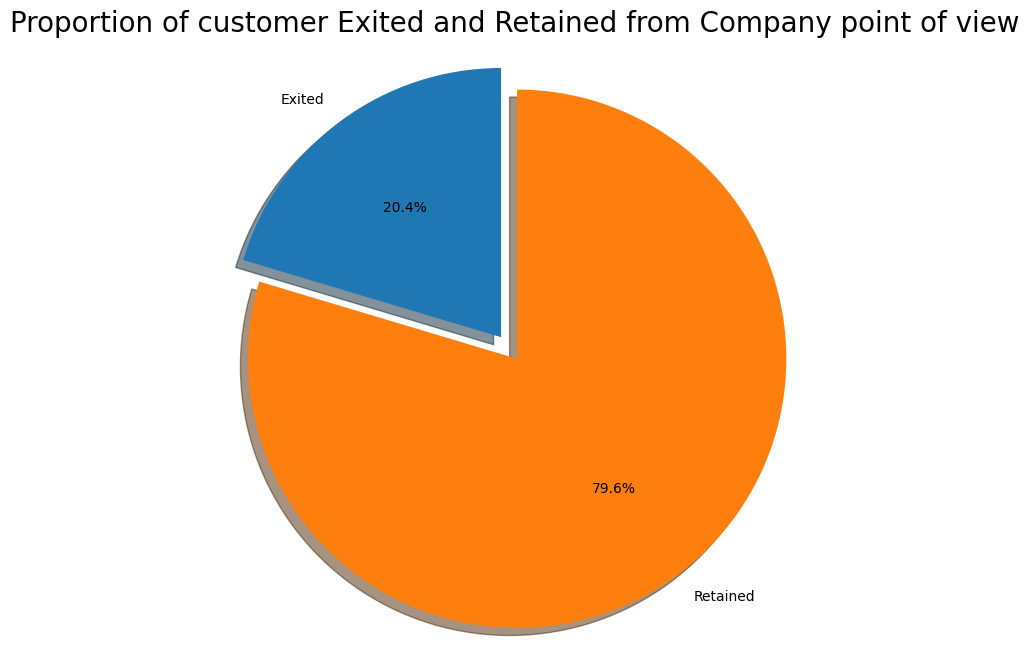

In [16]:
labels = 'Exited', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Exited and Retained from Company point of view", size = 20)
plt.show()

Decision Tree

In [17]:
df_product1['country'] = df_product1['country'].replace(['Germany'],'0')
df_product1['country'] = df_product1['country'].replace(['France'],'1')
df_product1['country'] = df_product1['country'].replace(['Spain'],'2')

In [18]:
X = df_product1.drop('churn', axis=1)
y = df_product1['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.4 %


In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X,y)
tuning_model.best_params_

Fitting 3 folds for each of 50400 candidates, totalling 151200 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_le

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1,

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, ma

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, ma

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END 

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=l

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=l

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=l

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_feat

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=l

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_de

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1,

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=l

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_f

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_de

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=s

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_f

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=s

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, 

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=s

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=s

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=s

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_de

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1,

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_feat

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=N

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1,

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=N

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=N

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=N

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=N

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=N

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] E

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END 

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3,

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_de

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_feat

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feat

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_f

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=a

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, ma

C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3,

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3,

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, ma

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_feat

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_f

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=l

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=l

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_feature

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.204 total time=   0.0s
[CV 2/3] END max_depth

In [22]:
df_product2['country'] = df_product2['country'].replace(['Germany'],'0')
df_product2['country'] = df_product2['country'].replace(['France'],'1')
df_product2['country'] = df_product2['country'].replace(['Spain'],'2')

In [27]:
X = df_product2.drop('churn', axis=1)
y = df_product2['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 77.5 %


In [28]:
df_product3['country'] = df_product3['country'].replace(['Germany'],'0')
df_product3['country'] = df_product3['country'].replace(['France'],'1')
df_product3['country'] = df_product3['country'].replace(['Spain'],'2')

In [32]:
X = df_product3.drop('churn', axis=1)
y = df_product3['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 77.3 %


Support Vector Machines

In [34]:
X = df_product1.drop('churn', axis=1)
y = df_product1['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 80.0 %


In [361]:
X = df_product2.drop('churn', axis=1)
y = df_product2['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 80.35 %


In [38]:
X = df_product3.drop('churn', axis=1)
y = df_product3['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 80.5 %
